<a href="https://colab.research.google.com/github/akhil7philip/School_Expenditure_in_UP/blob/main/Assignment_CivicDataLab_Akhil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Background

Annual Financial Statements (Budgets) of union, state, and local governments give the public a sneak peek at the intended expenditure for the upcoming financial year as well as the actual expenditure incurred in the previous financial year. These details are available in an aggregated form at the level of major, sub-major, and minor accounting heads. Most of the states publish them in PDF formats, restricting any meaningful analysis. 

##Koshvani
This [platform](https://koshvani.up.nic.in/KoshvaniStatic.aspx) is “a gateway to the finance activities in the state of Uttar Pradesh”. Developed and maintained by the state government, it’s a one-stop-destination for state’s expenditure and receipts at disaggregated and granular level. 

##Task
As part of a data exploration exercise, our team *scraped the expenditure data of Uttar Pradesh government for 4 financial years*. You can find the year-wise CSVs [here](https://drive.google.com/drive/folders/1leLy55YFop0PphhcrvRMCirI3gVxJ2ky).

From the data, *filter out expenditure related to only school education.*
* Calculate the share of expenditure on school education incurred by various departments/ministries. 
* Estimate the share of capital expenditure.
* Using projected population for each of the years under consideration, estimate the per-capita expenditure on school education in the state, and each district. 
* Rank the districts based on utilization of allotted funds of revenue expenditure and capital expenditure (separately). 

##Notes & Resources
* To understand about heads of account, refer to this [document](https://drive.google.com/file/d/1X-nrUrt4GqvFoOqGzABXmh24NqF4xj9B/view) published by the Controller General of Accounts.
* Document all assumptions made while cleaning the data. 
* You are free to use any other publicly available dataset to augment your work with appropriate citation. 
* Find the metadata for the datasets [here](https://docs.google.com/spreadsheets/d/1QHpSsr3ckcBn1afscMsmLyLJZMIFhCfAuGoCgwIlCXE/edit#gid=0).

##Output
Create a Github repository to share your code and analysis. You can use any notebook environment (RMarkdown or IPython) for this exercise.

##What are we looking for
1. Process: We want to understand your process. Documentation of this process would be a valuable addition.
2. Skills: Skill-set with respect to cleaning and analysing the datasets. 
3. Communication: Communication is key in a remote working environment such as ours. We want to observe how you communicate not just through your work but also with us via the various channels we have.

##Timeline
1 week. Do get back to us with any questions and clarifications. 

##How will CDL use the submission?
One of our key values is openness. Our work is  under [CC BY 4.0 license](https://creativecommons.org/licenses/by/4.0/) and If you choose to, we are happy to exhibit the submission online through our various channels. You are also free to make it part of your portfolio. In case CivicDataLab ends up using any of your work in our live solution(s), we would ensure full disclosure and fair compensation to the creator accordingly.

Co-creation & Collaboration
At CivicDataLab, we believe in collaboration and co-creation. Feel free to discuss your work with us throughout the given time period either through email or through a scheduled call. We’re more than happy to provide feedback on a continuous basis, and not just at the end of the task. In case you have any questions, don’t hesitate to ping us.



#Metadata
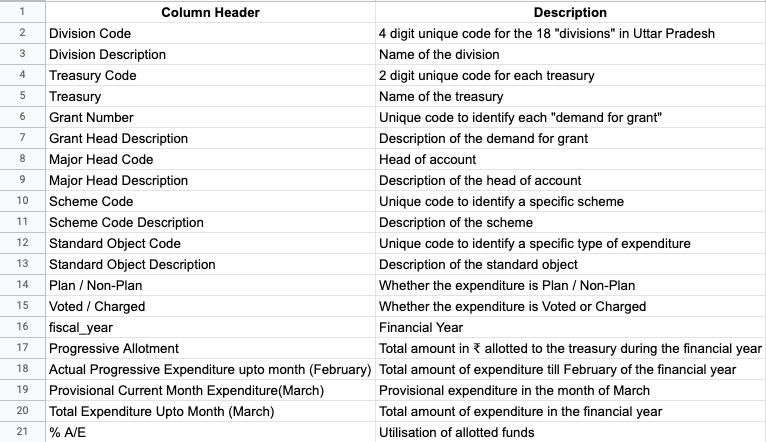

# Work

## Task

Available datasets: expenditure data of UP government for four FYs. 
https://drive.google.com/drive/folders/1leLy55YFop0PphhcrvRMCirI3gVxJ2ky

**Filter expenditure related to only school education.**
* Calculate the share of expenditure on school education incurred by various departments/ministries.
* Estimate the share of capital expenditure.
* Using projected population for each of the years under consideration, estimate the per-capita expenditure on school education in the state, and each district.
* Rank the districts based on utilization of allotted funds of revenue expenditure and capital expenditure (separately).

## Import packages and load data

In [5]:
import pandas as pd
import numpy as np

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
#df_17 = pd.read_csv('/content/gdrive/MyDrive/projects/district_wise_expenditure_data/district_level_mapping_2017.csv')
#df_18 = pd.read_csv('/content/gdrive/MyDrive/projects/district_wise_expenditure_data/district_level_mapping_2018.csv')
#df_19 = pd.read_csv('/content/gdrive/MyDrive/projects/district_wise_expenditure_data/district_level_mapping_2019.csv')
df_20 = pd.read_csv('/content/gdrive/MyDrive/projects/district_wise_expenditure_data/district_level_mapping_2020.csv')

# Exploratory Data Analysis (EDA)

In [48]:
df_20.head()

,Division Code,Division Description,Treasury Code,Treasury,Grant Number,Grant Head Description,Major Head Code,Major Head Description,Scheme Code,Scheme Code Description,Standard Object Code,Standard Object Description,Plan / Non-Plan,Voted / Charged,fiscal_year,Progressive Allotment,Actual Progressive Expenditure upto month (February),Provisional Current Month Expenditure(March),Total Expenditure Upto Month (March),% A/E,Grant Head Description Eng,Major Head Description Eng,Scheme Code Description Eng,Standard Object Description Eng
0,800.0,AGRA,8.0,AGRA,1,आबकारी विभाग,2039,राज्य उत्पाद शुल्क,2039000010300,अधीक्षण,1,वेतन,N,V,2020-2021,6245000,5493988.0,0,5493988.0,87.97,Excise Department,State excise duty,Superintendence,Salary
1,800.0,AGRA,8.0,AGRA,1,आबकारी विभाग,2039,राज्य उत्पाद शुल्क,2039000010300,अधीक्षण,3,मंहगाई भत्ता,N,V,2020-2021,1074000,1065293.0,0,1065293.0,99.19,Excise Department,State excise duty,Superintendence,dearness allowance
2,800.0,AGRA,8.0,AGRA,1,आबकारी विभाग,2039,राज्य उत्पाद शुल्क,2039000010300,अधीक्षण,4,यात्रा व्यय,N,V,2020-2021,10000,0.0,0,0.0,0.00,Excise Department,State excise duty,Superintendence,traveling expenses
3,800.0,AGRA,8.0,AGRA,1,आबकारी विभाग,2039,राज्य उत्पाद शुल्क,2039000010300,अधीक्षण,6,अन्य भत्ते,N,V,2020-2021,68000,12440.0,0,12440.0,18.29,Excise Department,State excise duty,Superintendence,other allowances
4,800.0,AGRA,8.0,AGRA,1,आबकारी विभाग,2039,राज्य उत्पाद शुल्क,2039000010300,अधीक्षण,8,कार्यालय व्यय,N,V,2020-2021,110000,51594.0,0,51594.0,46.90,Excise Department,State excise duty,Superintendence,office expense


In [35]:
df_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307949 entries, 0 to 307948
Data columns (total 20 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   Division Code                                         294135 non-null  float64
 1   Division Description                                  294135 non-null  object 
 2   Treasury Code                                         294135 non-null  float64
 3   Treasury                                              307949 non-null  object 
 4   Grant Number                                          307949 non-null  int64  
 5   Grant Head Description                                307949 non-null  object 
 6   Major Head Code                                       307949 non-null  int64  
 7   Major Head Description                                302338 non-null  object 
 8   Scheme Code                                 

###Missing values

In [41]:
# columns with missing values
[col for col in df_20.columns
 if df_20[col].isna().any()]

['Division Code',
 'Division Description',
 'Treasury Code',
 'Major Head Description']

###Unique values

In [36]:
# number of unique values in each head
df_20.nunique()

Division Code                                              18
Division Description                                       18
Treasury Code                                              78
Treasury                                                  103
Grant Number                                               89
Grant Head Description                                     89
Major Head Code                                           114
Major Head Description                                    112
Scheme Code                                              2226
Scheme Code Description                                  1885
Standard Object Code                                       62
Standard Object Description                                59
Plan / Non-Plan                                             1
Voted / Charged                                             2
fiscal_year                                                 1
Progressive Allotment                                   34671
Actual P

###Inference from EDA:
1. The Treasury code has only 78 values but Treasury has 103 values. Reasons:
    * Variations in name of Treasury for corresponding Treasury Code
    * null values in Treasury Code for corresponding Treasury
    * both of the above
2. We can translate the columns with Hindi names to Enlighs using a google translate API
3. df_20['Provisional Current Month Expenditure(March)'] + df_20['Actual Progressive Expenditure upto month (February)'] == df_20['Total Expenditure Upto Month (March)']

#### Dealing with Treasury values

In [44]:
df_20['Treasury'].unique()[:10]
# We can infer that Treasury values are similar to districts in UP
# https://en.wikipedia.org/wiki/List_of_districts_of_Uttar_Pradesh

array(['AGRA', 'ALIGARH', 'AMBEDKARNAGAR', 'AURAIYA', 'AYODHYA',
       'AZAMGARH', 'BADAUN', 'BAGHPAT SADAR', 'BAHRAICH', 'BALLIA'],
      dtype=object)

In [37]:
# print the multiple values in 'Treasury' for each 'Treasury Code' value
flag = False
for code in df_20['Treasury Code'].unique():
    list_ = df_20['Treasury'].where(df_20['Treasury Code'] == code).dropna().unique()
    if len(list_) > 1:
        print(list_)
        flag = True
if flag == False:
    print('No \'Treasury Code\' value has multiple \'Treasury\' value')

No 'Treasury Code' value has multiple 'Treasury' value


### 'Grant Head Description' analysis

In [61]:
# check if all values contain 'विभाग' in 'Grant Head Description':
df_20['Grant Head Description'].str.contains('विभाग').unique()

array([ True, False])

In [65]:
# False shows that some don't contain 'विभाग'
# Lets print those values
df_20['Grant Head Description'].where(
    df_20['Grant Head Description'].str.contains('विभाग') == False).dropna().unique()

array(['विधान परिषद् सचिवालय', 'विधान सभा सचिवालय'], dtype=object)

All values are part of some Department ('विभाग') except for
* विधान परिषद् सचिवालय is Legislative Council Secretariat
* विधान सभा सचिवालय is Legislative Assembly Secretariat

### Translate columns

Credits: https://towardsdatascience.com/translate-a-pandas-data-frame-using-googletrans-library-fb0aa7fca592

https://stackoverflow.com/questions/52455774/googletrans-stopped-working-with-error-nonetype-object-has-no-attribute-group

* आबकारी विभाग - Excise Department (Grant Head Description)
* राज्य उत्पाद शुल्क - State excise duty (Major Head Description)
* अधीक्षण - Superintendent (Scheme Code Description)
* वेतन - Salary (Standard Object Description)

In [21]:
# install googletrans using pip
#!pip install googletrans==4.0.0-rc1

#from googletrans import Translator

In [2]:
#translator = Translator()

use translate method to translate each Hindi value into a dictionary of unique values with English translation

In [20]:
#translation = translator.translate('이 문장은 한글로 쓰여졌습니다.', dest='en')
#print(translation.text)
#This sentence is written in Korean.

In [ ]:
#GHD_unique = {text : translator.translate(text, dest='en').text for text in df_20['Grant Head Description'].unique()}

In [9]:
#MHD_unique = {text : translator.translate(text, dest='en').text for text in df_20['Major Head Description'].unique()}

In [17]:
#SCD_unique = {text : translator.translate(text, dest='en').text for text in df_20['Scheme Code Description'].unique()}

In [13]:
#SOD_unique = {text : translator.translate(text, dest='en').text for text in df_20['Standard Object Description'].unique()}

In [19]:
# Save
#np.save('/content/gdrive/MyDrive/projects/GHD_unique.npy', GHD_unique)
#np.save('/content/gdrive/MyDrive/projects/MHD_unique.npy', MHD_unique)
#np.save('/content/gdrive/MyDrive/projects/SCD_unique.npy', SCD_unique)
#np.save('/content/gdrive/MyDrive/projects/SOD_unique.npy', SOD_unique)

In [37]:
# Load
GHD_unique = np.load('/content/gdrive/MyDrive/projects/GHD_unique.npy', allow_pickle='TRUE').item()
MHD_unique = np.load('/content/gdrive/MyDrive/projects/MHD_unique.npy', allow_pickle='TRUE').item()
SCD_unique = np.load('/content/gdrive/MyDrive/projects/SCD_unique.npy', allow_pickle='TRUE').item()
SOD_unique = np.load('/content/gdrive/MyDrive/projects/SOD_unique.npy', allow_pickle='TRUE').item()

In [43]:
# create new column with English translation, by replacing values in corresponding Hindi column with English values
df_20['Grant Head Description Eng'] = df_20['Grant Head Description'].replace(GHD_unique)

In [44]:
df_20['Major Head Description Eng'] = df_20['Major Head Description'].replace(MHD_unique)

In [45]:
df_20['Scheme Code Description Eng'] = df_20['Scheme Code Description'].replace(SCD_unique)

In [46]:
df_20['Standard Object Description Eng'] = df_20['Standard Object Description'].replace(SOD_unique)

In [47]:
df_20.head()

,Division Code,Division Description,Treasury Code,Treasury,Grant Number,Grant Head Description,Major Head Code,Major Head Description,Scheme Code,Scheme Code Description,Standard Object Code,Standard Object Description,Plan / Non-Plan,Voted / Charged,fiscal_year,Progressive Allotment,Actual Progressive Expenditure upto month (February),Provisional Current Month Expenditure(March),Total Expenditure Upto Month (March),% A/E,Grant Head Description Eng,Major Head Description Eng,Scheme Code Description Eng,Standard Object Description Eng
0,800.0,AGRA,8.0,AGRA,1,आबकारी विभाग,2039,राज्य उत्पाद शुल्क,2039000010300,अधीक्षण,1,वेतन,N,V,2020-2021,6245000,5493988.0,0,5493988.0,87.97,Excise Department,State excise duty,Superintendence,Salary
1,800.0,AGRA,8.0,AGRA,1,आबकारी विभाग,2039,राज्य उत्पाद शुल्क,2039000010300,अधीक्षण,3,मंहगाई भत्ता,N,V,2020-2021,1074000,1065293.0,0,1065293.0,99.19,Excise Department,State excise duty,Superintendence,dearness allowance
2,800.0,AGRA,8.0,AGRA,1,आबकारी विभाग,2039,राज्य उत्पाद शुल्क,2039000010300,अधीक्षण,4,यात्रा व्यय,N,V,2020-2021,10000,0.0,0,0.0,0.00,Excise Department,State excise duty,Superintendence,traveling expenses
3,800.0,AGRA,8.0,AGRA,1,आबकारी विभाग,2039,राज्य उत्पाद शुल्क,2039000010300,अधीक्षण,6,अन्य भत्ते,N,V,2020-2021,68000,12440.0,0,12440.0,18.29,Excise Department,State excise duty,Superintendence,other allowances
4,800.0,AGRA,8.0,AGRA,1,आबकारी विभाग,2039,राज्य उत्पाद शुल्क,2039000010300,अधीक्षण,8,कार्यालय व्यय,N,V,2020-2021,110000,51594.0,0,51594.0,46.90,Excise Department,State excise duty,Superintendence,office expense


### Inference from basic analysis
1. Null values in place of 25 unique 'Treasury Code' values. Thus we will label encode Tresury values for analysis, instead of using Treasury Code values


## Comments

*   Datatype for metadata could be provided




# Approach:
* translate specific columns from Hindi to English (https://towardsdatascience.com/translate-a-pandas-data-frame-using-googletrans-library-fb0aa7fca592)

**Filter expenditure related to only school education.**
* Go through Grant Head Description(89), Major Head Description(112), Scheme Code Description(1885), Standard Object Description(59) and find those that relate to school education
* Got a translation done; Focus on departments (from Grant Head Description) like Education Department (Primary Education), Education Department (Secondary Education).

**Calculate the share of expenditure on school education incurred by various departments/ministries.**
* From above, groupby based on Major Head Description (Departments), and find share based on Progressive Allotment and Total Expenditure Upto Month (March)

**Estimate the share of capital expenditure.**
* Major Head Description (Departments) can be used (identify manually from 112 values?) to find share of capital expenditure. I'm assuming this has to be on Department/Ministry basis?

**Using projected population for each of the years under consideration, estimate the per-capita expenditure on school education in the state, and each district**
* find proj. population for years (https://nhm.gov.in/New_Updates_2018/Report_Population_Projection_2019.pdf, https://censusindia.gov.in/Census_Data_2001/Projected_Population/Projected_Population.pdf)
* per-capita exp. for district can be based on expenditure on school education by grouping based on Treasury values?

**Rank the districts based on utilization of allotted funds of revenue expenditure and capital expenditure (separately).**
1. filter for Districts on basis of Treasury values
2. filter for capital expenditure from above analysis (revenue exp. from remaining values)
3. utilisation of fund on basis of % A/E values

#Additional analysis that could be explored:
* It is possible that other departments could have expenditure dedicated to children (via awareness programs, scholarships, etc). Some departments like Sports department, Department of Technical Education, Department of Women and Child Welfare, Vocational education department, Education Department (Higher Education), Education Department (State Educational Research and Training Council), etc (under Grant Head Description)
* 



# Questions:
* Is it safe to ignore Division Code, Division values, as we can just use Treasury values for analysis
* Treasury values are locations of treasuries among districts of UP